In [2]:
from IPython.display import Image
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Made Easy: Mixture Density Network regression

In this article, I will first explain briefly what a MDN is and then give you the python codes to make your own MDN model with only a few lines of codes.
First… Mixture Density Network regression … huh What !??? Let’s start slow and explain separately and quickly all the main terms here:

1.	Regression
2.	Density
3.	Mixture Density
4.	Network
5.	Regression Network
6.	Density Network
7.	Mixture Density Network regression
8.	Practice fun – Univariate dataset with custom MDN class
9.	Practice fun – Multivariate dataset with custom MDN class



# 1-REGRESSION
First, the term “regression”. If you have click on this article, I assume you know what regression is all about, but if not, here a really quick and simple explanation from Jason Brownlee of Machine Learning Mastery:
•	“Regression predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y) […] A regression problem requires the prediction of a quantity. A problem with multiple input variables is often called a multivariate regression problem […] For example, a house may be predicted to sell for a specific dollar value, perhaps in the range of 100,000$ to 200,000$ […] ” (Source: https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/#:~:text=A%20regression%20problem%20requires%20the,called%20a%20multivariate%20regression%20problem.)
Here another visual explanation that differentiate a classification problem from a regression problem (source: https://towardsdatascience.com/regression-or-classification-linear-or-logistic-f093e8757b9c):

In [3]:
Image("reg_class.png", width=400, height=400)

A Last one for the skeptics… (source: https://vinodsblog.com/2018/11/08/classification-and-regression-demystified-in-machine-learning/)

In [4]:
Image("reg_class2.png", width=800, height=800)

## 2-DENSITY
Okay, now what the term **“density”** is all about? Here a quick **“cheesy”** example:

•	Suppose you are delivering pizza for pizza-hut. You decide to capture the time (in minutes) of each delivery you just made. After 1000 deliveries, you decide to visualize your data to see how well you performed. Here is the result (source: https://statisticsbyjim.com/basics/normal-distribution/):


In [5]:
Image("density.png", width=600, height=600)

Here is the **“density”** of the distribution of your pizza delivery times data. Soo, in **average**, it took you 30 minutes per delivery (The peak in the graph). It also says that 95% of the time (2 **standard deviations (SD)**), your delivery took between 20 and 40 minutes to accomplish. Here, the density kind of represents the “frequency” of the time results. The difference between **“frequency”** and **“density”** is that:

•	**Frequency**: If you draw a histogram under this curve and counts all the bins, it will sum up to any whole number (depending on the total number of observations captured in your dataset).

•	**Density**: If you draw a histogram under this curve and counts all the bins it will always sum up to 1. We can also call this curve the probability density function (pdf).

In statistical terms, this is a beautiful normal / Gaussian distribution. This normal distribution have two parameters:
•	The **mean**
•	The **standard deviation** (According to Wikipedia: Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out.)
The change of mean and standard deviation will affect the shape of the distribution. 

For Example:
https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc:


In [6]:
Image("dist.png", width=600, height=600)

Of course, there exists a variety of different distributions types with different kind of parameters. For example:

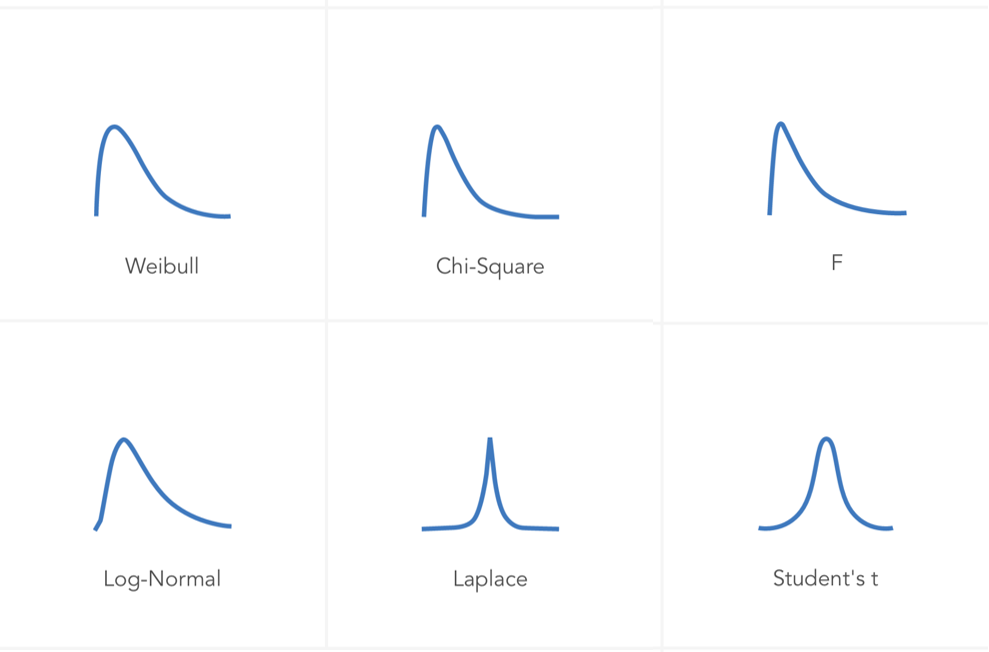

In [7]:
Image("dist_2.png", width=500, height=500)

## 3-MIXTURE DENSITY
Okay now let’s have a look at those 3 distributions:


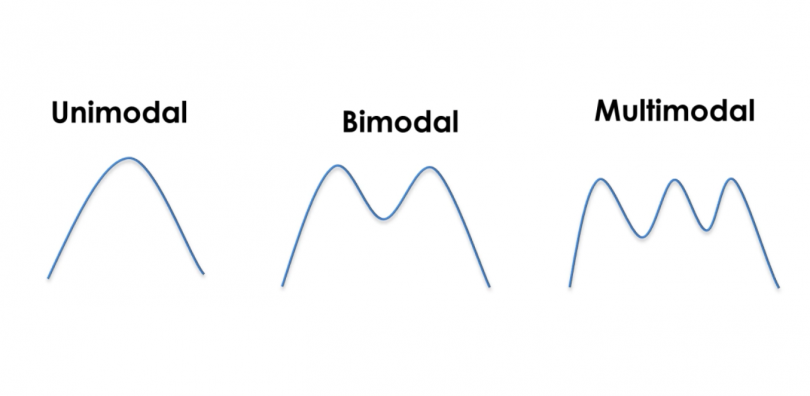

In [8]:
Image("dist3.png", width=400, height=400)

Source: https://medium.com/analytics-vidhya/learning-from-multimodal-target-mixture-density-network-94891d4e357e
If we take this bimodal distribution (Also called a general distribution):


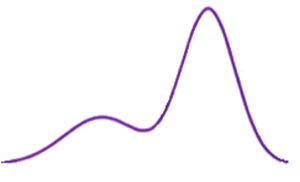

In [9]:
Image("dist4.png", width=200, height=200)

Mixture Density Network use the assumption that any general distribution like this bimodal distribution can be broken down into a mixture of normal distributions (The mixture can also be customize with other type of distributions like Laplace for example):

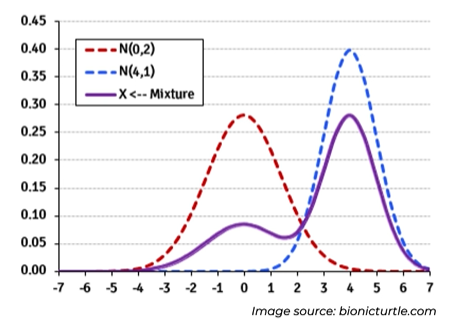

In [10]:
Image("dist5.png", width=400, height=400)

Soo if you add up those 2 normal distributions (red and blue), where each distribution have is own mean and standard deviation, it will gives back the bimodal general distribution (purple).

## 4-NETWORK
Network for Artificial neural network. Soo yes, a Mixture Density Network is a type of artificial neural network. Here a classical example of a neural network:


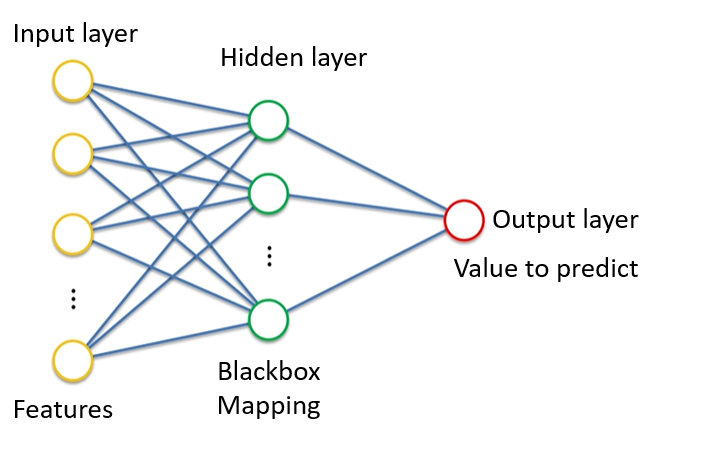

In [11]:
Image("net1.png", width=600, height=600)

You have the input layer (yellow), the hidden layer (green) and the output layer (red). (I assume here that everyone know what an artificial neural network is, if not, go on google to find out!).

## 5-REGRESSION NETWORK

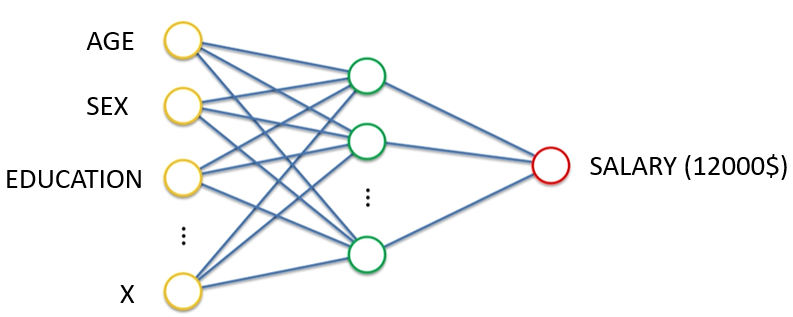

In [12]:
Image("net2.png", width=600, height=600)

A regression network is an artificial neural network where the goal is to learn to output a continuous value given some features.  In the example above, given the age, sex, education and other features, the artificial neural network learns to predict the salary.

## 6-DENSITY NETWORK

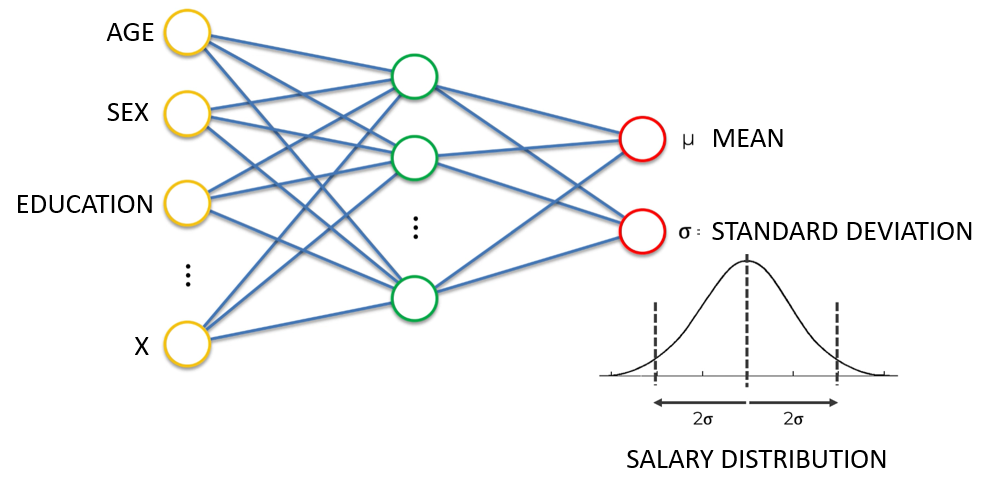

In [13]:
Image("net3.png", width=600, height=600)

A density network is an artificial neural network where the goal is not to simply learn to output a single continuous value, but to learn to output the distribution parameters (here, mean and standard deviation) of this single expected salary value, given the specific features inputs. In the example above, given the age, sex, education and other features, the artificial neural network learns to predict the mean and the standard deviation of the expected salary distribution. Predicting the distribution versus a single value have advantages like being able to gives uncertainty boundaries with the prediction. This is a “Bayesian” approach of resolving a regression problem. Here is a great illustration of predicting the distribution of each expected continuous values:

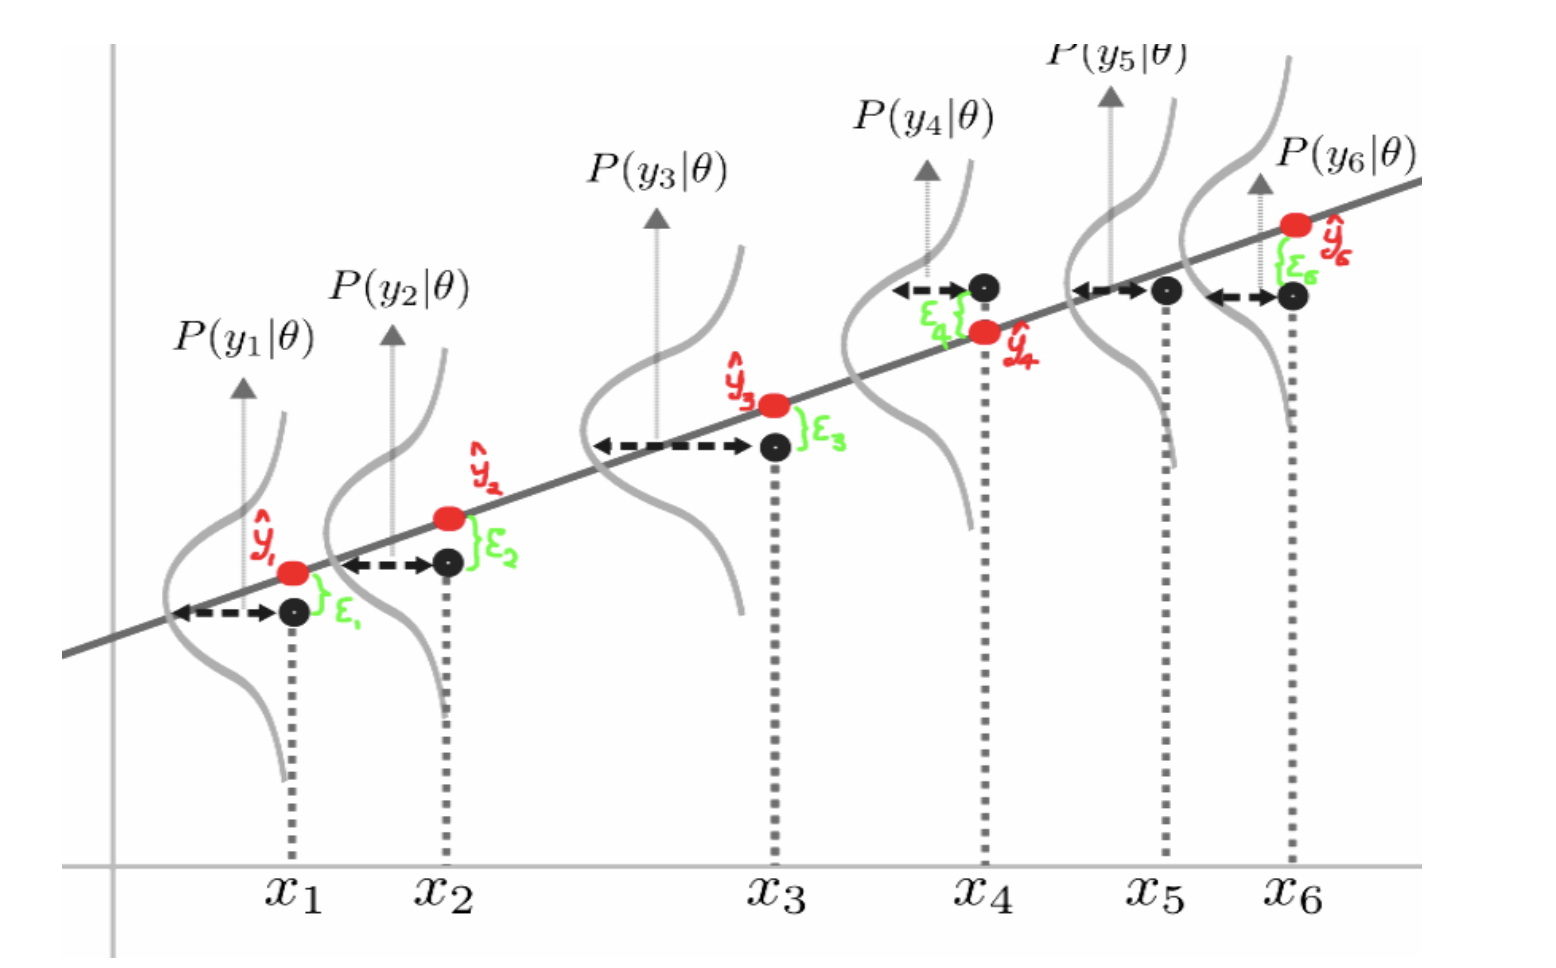

In [14]:
Image("prob1.png", width=600, height=600)

Source: https://towardsdatascience.com/bayesian-thinking-estimating-posterior-distribution-for-linear-regression-data-ketchup-2f50a597eb06
Another great illustration that shows us the distribution of the expected values, for each predicted instance:


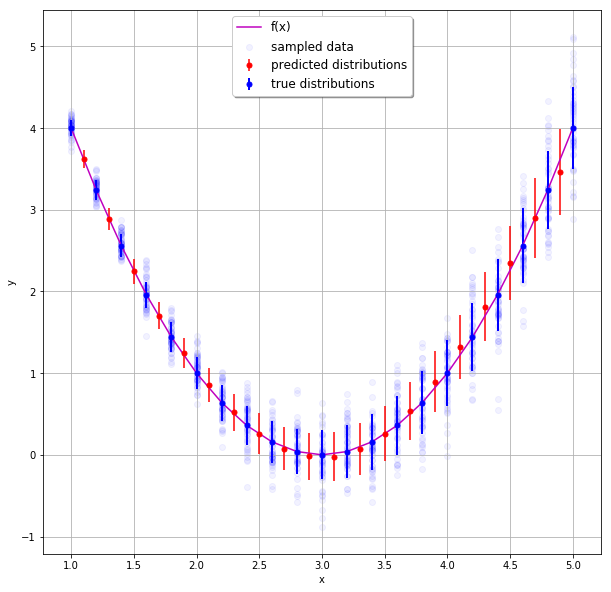

In [15]:
Image("prob2.png", width=600, height=600)

Source : https://engineering.taboola.com/predicting-probability-distributions/


## 7-MIXTURE DENSITY NETWORK
Finally! A density network is an artificial neural network where the goal is to learn to output all the distributions parameters (here, the mean, standard deviation and Pi) of the general distribution (mixture) of the salary, given the specific features inputs. The new parameter “Pi” is the mixture parameter that gives the weights/probability of a given distribution in the final mixture.


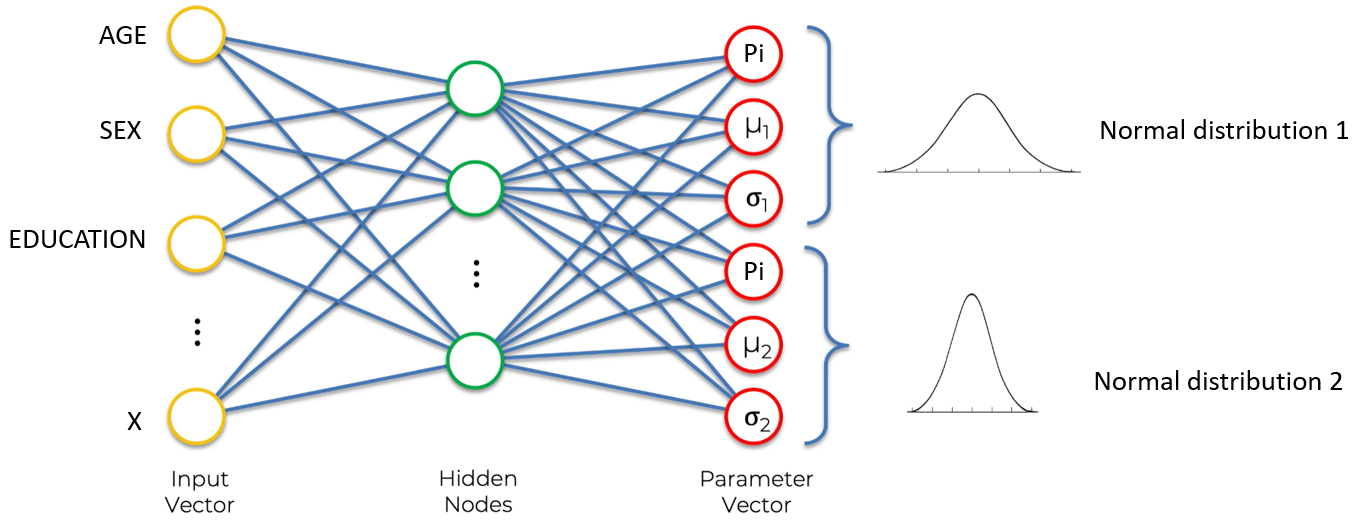

In [16]:
Image("prob_net.png", width=800, height=800)

The final result:

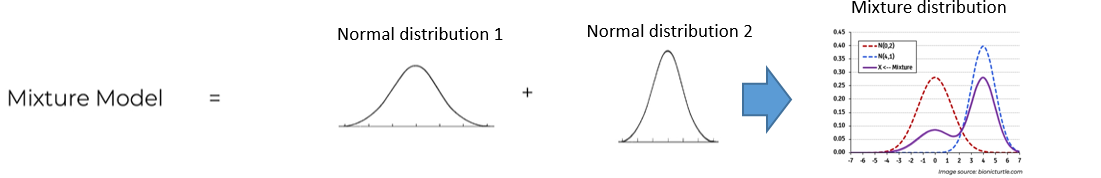

In [17]:
Image("prob_net2.png", width=900, height=900)

## 8-PRACTICE FUN – UNIVARIATE DATASET WITH CUSTOM MDN CLASS 

Okay, enough of this theoretical stuff, let’s do it!


In [18]:
import numpy as np
import pandas as pd

from mdn_model import MDN

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

plt.style.use('ggplot')

Instructions for updating:
non-resource variables are not supported in the long term


Here we have this famous “half-moon” dataset:

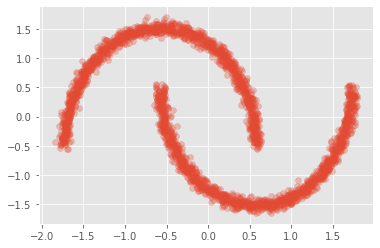

In [19]:
X, y = make_moons(n_samples=2500, noise=0.03)
y = X[:, 1].reshape(-1,1)
X = X[:, 0].reshape(-1,1)

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X = x_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

plt.scatter(X, y, alpha = 0.3)

Just by looking at the data, we can see that there is two overlapping clusters.

If we plot the density distribution of the target value (y):


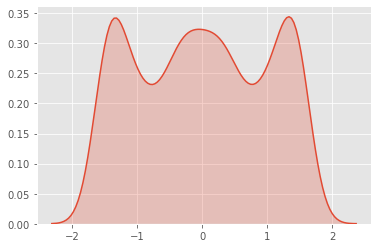

In [20]:
sns.kdeplot(y.ravel(), shade=True)

We have a nice “ghost-like” multimodal distribution (general distribution). If we try a standard Linear Regression on this dataset to predict y with X:

In [21]:
model = LinearRegression()
model.fit(X.reshape(-1,1), y.reshape(-1,1))
y_pred = model.predict(X.reshape(-1,1))

Text(0.5, 1.0, 'Linear Regression')

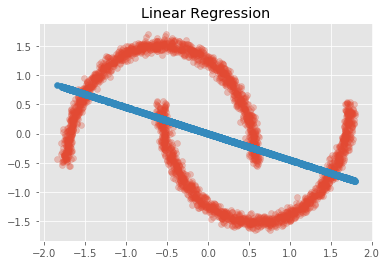

In [22]:
plt.scatter(X, y, alpha = 0.3)
plt.scatter(X,y_pred)
plt.title('Linear Regression')

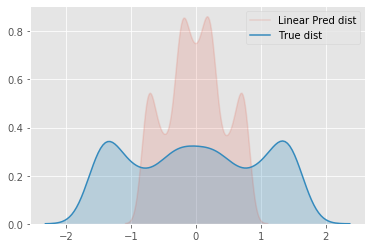

In [23]:
sns.kdeplot(y_pred.ravel(), shade=True, alpha = 0.15, label = 'Linear Pred dist')      
sns.kdeplot(y.ravel(), shade=True, label = 'True dist')

Linear Regression Did not work very well! 
Let’s now try a nonlinear model (Radial Basis Function Kernel Ridge regression):


In [24]:
model = KernelRidge(kernel = 'rbf')
model.fit(X, y)
y_pred = model.predict(X)

Text(0.5, 1.0, 'Non Linear Regression')

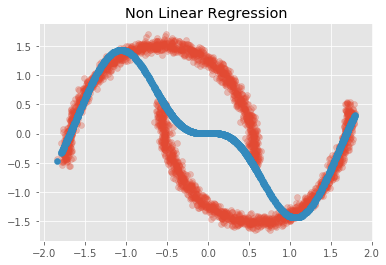

In [25]:
plt.scatter(X, y, alpha = 0.3)
plt.scatter(X,y_pred)
plt.title('Non Linear Regression')

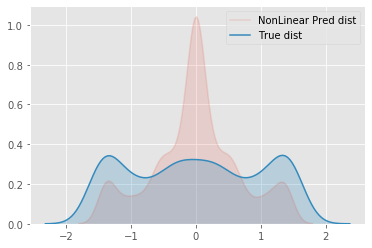

In [26]:
sns.kdeplot(y_pred.ravel(), shade=True, alpha = 0.15, label = 'NonLinear Pred dist')      
sns.kdeplot(y.ravel(), shade=True, label = 'True dist')

Better, but not quite yet! 
The main reason why both model did not make it is because, if you look on the X-axis, multiple different y values exists for the same X value… more specifically, there seems to exists more than one possible y distribution for the same X, the data come from a mixed distribution. 

The regression model just tried to find the optimal function that minimize the error and did not took in consideration a mixture of densities, which is the case! Those X in the middle do not have a unique Y solution, they have two possible solutions, one high and one low!

Let’s now try a MDN model to see what this beast can do! 

For that, I implemented for you a quick nice and easy to use “fit-predict”, “sklearn alike” customized python MDN class. Here is the link to my python code if you want to use it yourself (Be aware: this MDN class is experimental and has not been extensively tested).

To be able to use this class, you will need to have sklearn, Tensorflow < 2 (If you want to make this MDN model class compatible with TF2, feel free to contribute!), umap and hdbscan (for custom visualization class function):


In [27]:
EPOCHS = 10000
BATCH_SIZE=len(X)

model = MDN(n_mixtures = -1, 
            dist = 'laplace',
            input_neurons = 100, 
            hidden_neurons = [25], 
            gmm_boost = False,
            optimizer = 'adam',
            learning_rate = 0.001, 
            early_stopping = 250,
            tf_mixture_family = True,
            input_activation = 'relu',
            hidden_activation = 'leaky_relu')

model.fit(X, y, epochs = EPOCHS, batch_size = BATCH_SIZE)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
last 2
Instructions for updating:
The `logits` property will return `None` when the distribution is parameterized with `logits=None`. Use `logits_parameter()` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0 Loss: 1.589
Epoch: 1 Loss: 1.568
Epoch: 2 Loss: 1.566
Epoch: 3 Loss: 1.551
Epoch: 4 Loss: 1.540
Epoch: 5 Loss: 1.525
Epoch: 6 Loss: 1.518
Epoch: 7 Loss: 1.503
Epoch: 9 Loss: 1.480
Epoch: 12 Loss: 1.461
Epoch: 14 Loss: 1.459
Epoch: 15 Loss: 1.444
Epoch: 18 Loss: 1.432
Epoch: 22 Loss: 1.422
Epoch: 25 Loss: 1.418
Epoch: 26 Loss: 1.410
Epoch: 32 Loss: 1.406
Epoch: 36 Loss: 1.403
Epoch: 38 Loss: 1.401
Epoch: 40 Loss: 1.385
Epoch: 45 Loss: 1.375
Epoch: 48 Loss: 1.374
Epoch: 51 Loss: 1.360
Epoch: 55 Loss: 1.352
Epoch: 59 Loss: 1.349
Epoch: 62 Loss: 1.335
Epoch: 64 Loss: 1.328
Epoch: 66 Loss: 1.326
E

•	**n_mixtures**: number of distribution mixtures to use by the MDN. If set to -1, it will “auto” find the optimal number of mixtures using a gaussian mixtures model (GMM) and a HDBSCAN model on X and y.

•	**dist**: Distribution type to use in the mixture. For now, there are two choices available; “normal” or “laplace”. (Based on some experimentations, Laplace distribution gave me better results than normal distribution).

•	**input_neurons**: Number of neurons to use in the input layer of the MDN

•	**hidden_neurons**: Architecture of the hidden layers. Of the MDN. List of neurons per hidden layer. This parameter give you the ability to choose the number of hidden layers and the number of neurons per hidden layer.

•	**gmm_boost**: Boolean. If set to True, will add cluster features to the dataset.

•	**optimizer**: Optimization algorithm to use.

•	**learning_rate**: Learning rate of the optimization algorithm

•	**early_stopping**: To avoid overfitting when training. This trigger will decide when to stop training when no change in metric over a given number of epochs.

•	**tf_mixture_family**: Boolean. If set to True, will use the tf_mixture family (Recommended): The Mixture object implements batched mixture distributions. The mixture model is defined by a Categorical distribution (the mixture) and a python list of Distribution objects.

•	**input_activation**: Activation function of the input layer

•	**hidden_activation**: Activation function of the hidden layer

Now that our MDN model is fitted on the data, let’s samples from the mixture density distribution and plot the probability density function: 


1... /1


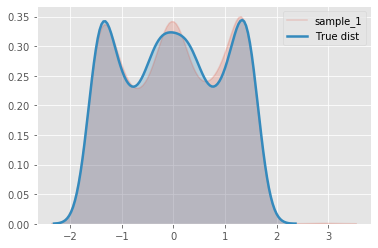

In [28]:
model.plot_distribution_fit(n_samples_batch = 1)

Wow! Our MDN model fitted pretty well the true general distribution! 
We can broke down the final mixture distribution into each distribution to see how it looks:


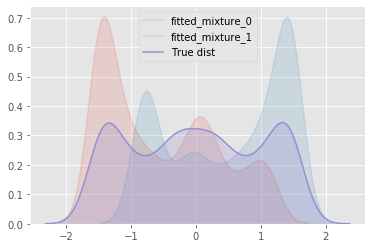

In [29]:
model.plot_all_distribution_fit(n_samples_batch = 1)

Let’s sample again some Y data using our learned mixture distribution and this time, plot the generated samples against the true ones:

1... /1
1... /10


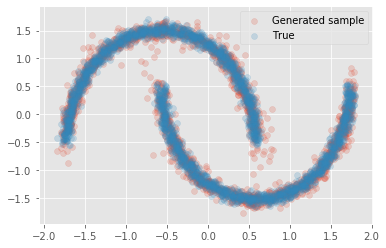

In [30]:
model.plot_samples_vs_true(X, y, alpha = 0.2)
generated_samples = model.sample_from_mixture(X, n_samples_batch = 10)

Again, pretty close from reality! 
Given X, we can also generate multiple batch of sample to produce statistics like quantile, mean, etc.:


Now, we can plot the mean of each of our learned distributions, with their respective **mixture weights (pi)**:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


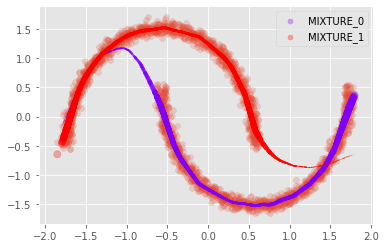

In [31]:
plt.scatter(X, y, alpha = 0.2)
model.plot_predict_dist(X, with_weights = True, size = 250)

Wow, MDN just nailed it, again!
As we have the mean and the standard deviation from each distribution, we can also plot the uncertainties with the full tail; 

let’s say we plot the mean with a confidence interval of 95%:


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

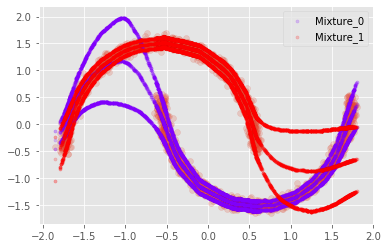

In [32]:
plt.scatter(X, y, alpha = 0.2)
model.plot_predict_dist(X, q = 0.95, with_weights = False)



We can also mix the distribution together and, when we have multiple y distributions for the same X, we choose the **most probable mixture using the highest Pi parameter value**:

•	Y_preds = for each X, choose the Y mean of the distribution with the max probability/weight (Pi parameter)

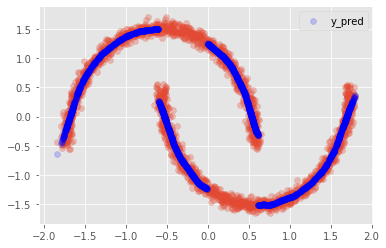

In [33]:
plt.scatter(X, y, alpha = 0.3)
model.plot_predict_best(X)



If we add the 95% confidence interval:

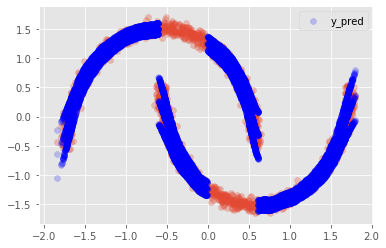

In [34]:
plt.scatter(X, y, alpha = 0.3)
model.plot_predict_best(X, q = 0.95)



Not ideal here, because there are clearly two distinct clusters overlapping in our data with near equivalent density. 
The errors would be higher than a standard regression model. 

This also means that maybe there is an important feature missing in our dataset that could help to avoid the cluster overlapping in a higher dimensionality. 

We can also choose to **mix the distribution using the Pi parameters and the means of all the distribution together**:
    
•	Y_preds = (mean_1 * Pi1) + (mean_2 * Pi2)

Which gives:


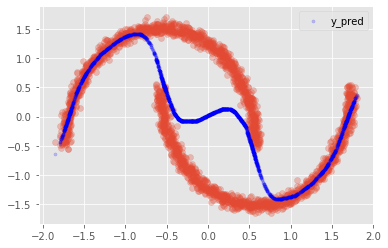

In [35]:
plt.scatter(X, y, alpha = 0.3)
model.plot_predict_mixed(X)



If we add the 95 confidence interval:

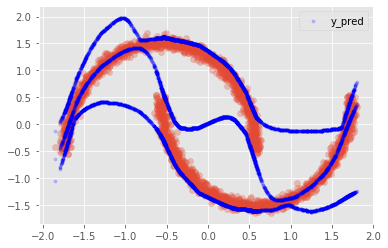

In [36]:
plt.scatter(X, y, alpha = 0.3)
model.plot_predict_mixed(X, q = 0.95)



This option gives us pretty much the same result as a non-linear regression model, mixing everything to minimize the distance between the dots and the function. This gives a single function that pass through the two clusters.


In this very particular case, my favorite option would be to assume that in some region of the data, X have more than one Y while in other regions; only one of the mixture is used. That give use something like:


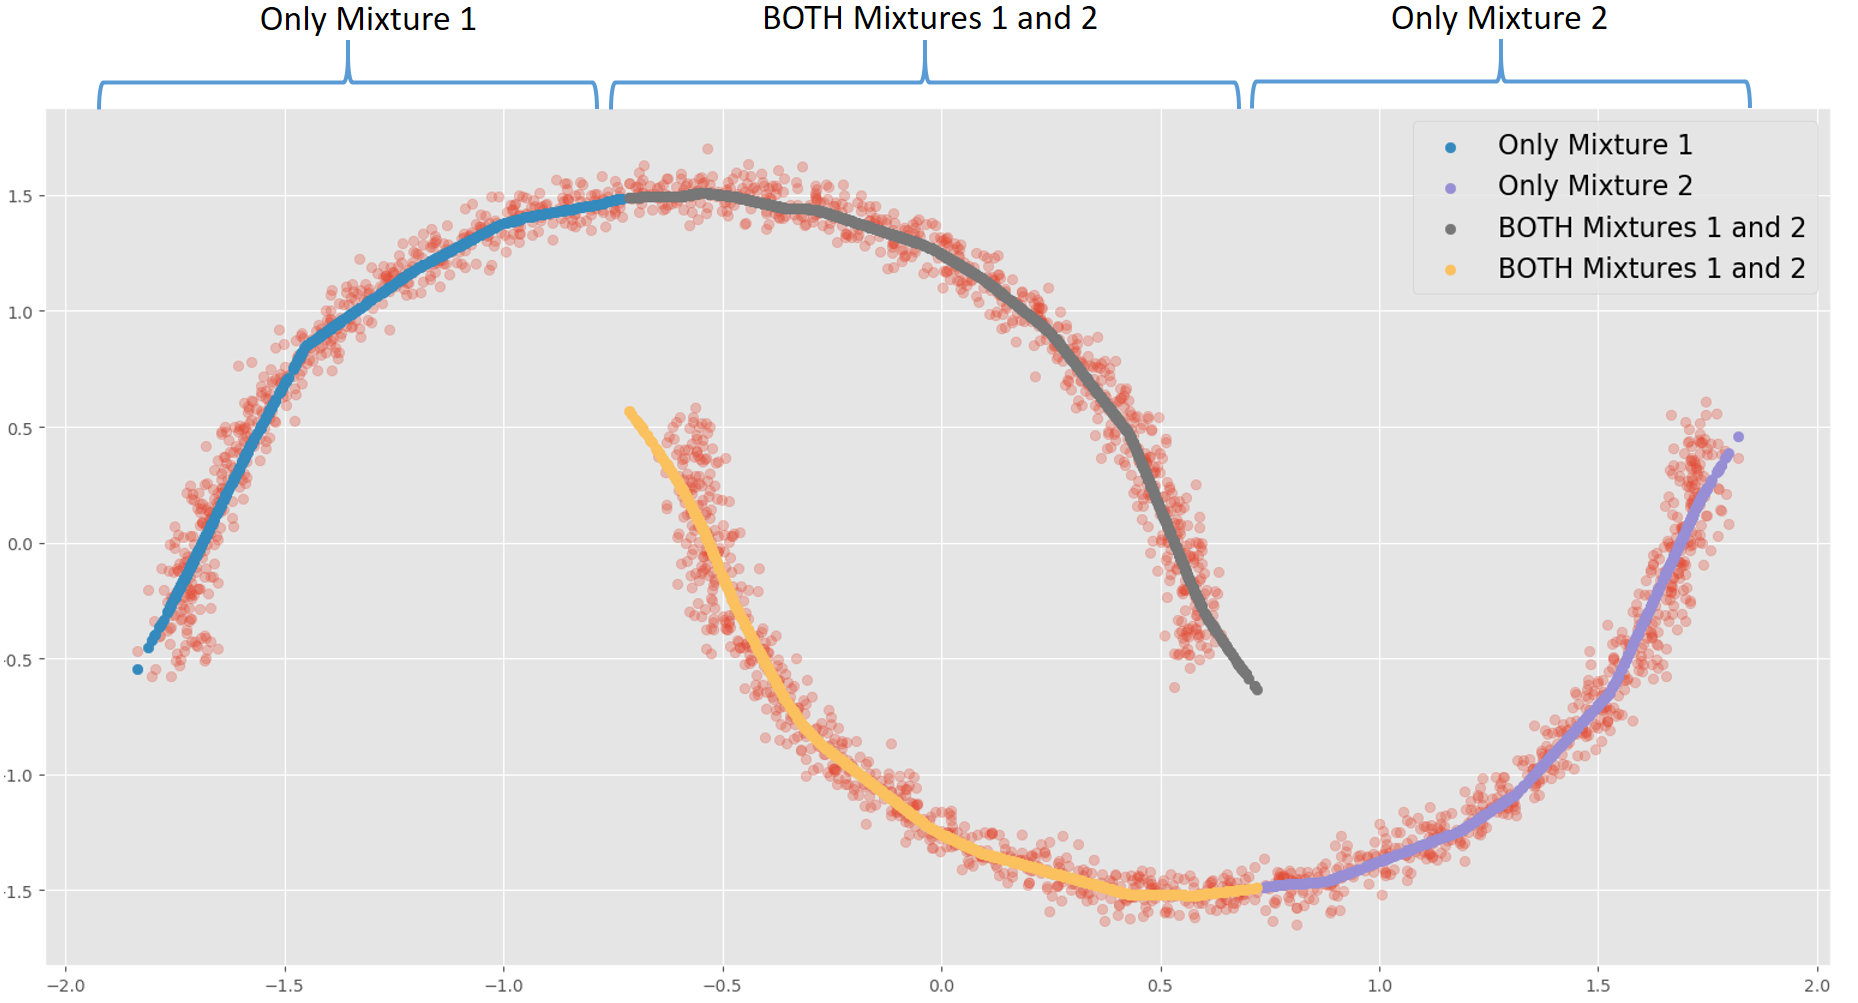

In [37]:
Image("mdn_overlaps.png", width=900, height=900)

For example, when X = 0, there is two possible distinctive Y solutions from each mixture. When X = -1.5, there is a unique Y solution from mixture 1. Depending on the use case or business context, an action or decision can be triggered when more than one solution exists for the same X.

With this option, the rows are duplicated when there is an overlapping distribution (If both mixture probabilities are >= given probability threshold). This give something like:


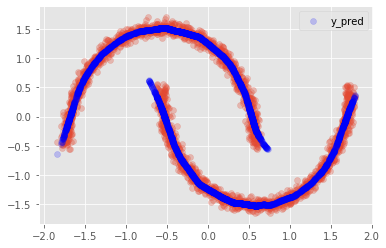

In [38]:
plt.scatter(X, y, alpha = 0.3)
model.plot_predict_with_overlaps(X)



With the 95% confidence interval:

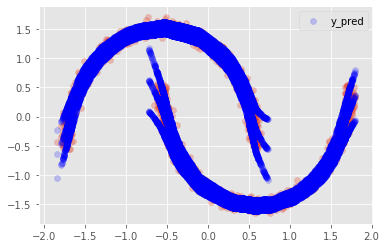

In [39]:
plt.scatter(X, y, alpha = 0.3)
model.plot_predict_with_overlaps(X, q = 0.95)



Dataset rows passed from 2500 to 4063 and the final predictions dataset looks like:
    

In [40]:
y_pred = model.predict_with_overlaps(X, q = 0.95, pi_threshold = 0.2)

In [41]:
y_pred.head(10)

,X0,Y_PRED_MEAN,Y_PRED_LOWER,Y_PRED_UPPER,DIST_PI,POSSIBLE_MIX,SOURCE
0,0.312441,-1.468425,-1.559189,-1.377660,0.307580,"M0,M1",M0
1,0.556093,-1.518540,-1.608508,-1.428573,0.374034,"M0,M1",M0
2,0.087126,-1.313500,-1.420105,-1.206895,0.432667,"M0,M1",M0
3,0.495553,-1.504111,-1.593419,-1.414803,0.320028,"M0,M1",M0
4,0.059448,-1.291387,-1.400358,-1.182416,0.451333,"M0,M1",M0
5,1.001254,-1.381467,-1.477534,-1.285400,0.981155,M0,M0
6,0.401161,-1.485428,-1.574759,-1.396096,0.294788,"M0,M1",M0
7,0.504170,-1.506359,-1.595779,-1.416939,0.326428,"M0,M1",M0
8,-0.210494,-0.963477,-1.113039,-0.813915,0.626937,"M0,M1",M0
9,0.915594,-1.421806,-1.513394,-1.330217,0.962491,M0,M0


In this data table, we see that, for example, when X = -0.276839, Y can be 1.43926 (with 0.351525 of probabilities of mixture_0) but can also be -0.840593 (with 0.648475 of probabilities of mixture_1).

The instances with multiple distributions gives also an important information that something is going on in the data and that maybe it needs more analysis. Maybe it is some data quality problems or maybe it indicates that an important feature is missing in the dataset!

**Another example**: “traffic scene prediction is a good candidate for where Mixture Density Networks can be used. In traffic scene prediction, we need a distribution over behaviors an agent can exhibit — for example, an agent could turn left, turn right, or go straight. Thus, Mixture Density Networks can be used to represent “behaviors” in each of the mixture it learns, where the behavior consists of a probability and trajectory ((x, y) coordinates up to some time horizon in the future).“

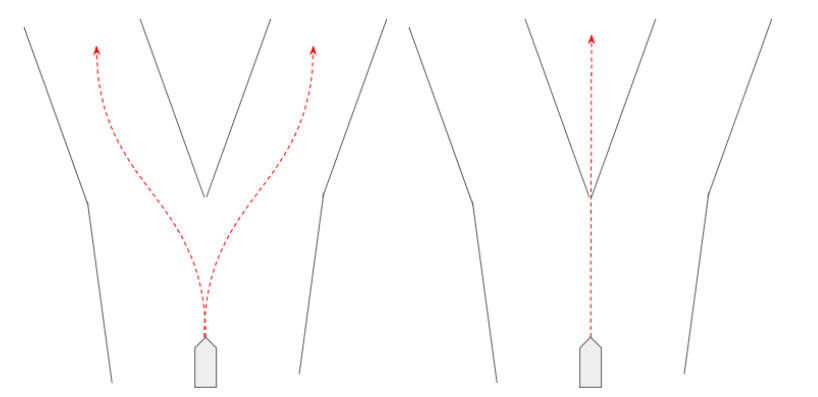

In [42]:
Image("traffic.png", width=500, height=500)

Source: http://blog.adeel.io/tag/mixture-density-networks/

11 9-PRACTICE FUN – MULTIVARIATE DATASET WITH CUSTOM MDN CLASS 

Okay finally, does MDN perform well with multivariate regression problems? Let’s find out !

First of all, let’s have a look at the dataset we will use: 


In [43]:
"""
#################
# 2-IMPORT DATA #
#################
"""
dataset = pd.read_csv('insurance_clean.csv', sep = ';')

##### BASIC FEATURE ENGINEERING
dataset['age2'] = dataset['age'] * dataset['age']
dataset['BMI30'] = np.where(dataset['bmi'] > 30, 1, 0)
dataset['BMI30_SMOKER'] = np.where((dataset['bmi'] > 30) & (dataset['smoker_yes'] == 1), 1, 0)

In [44]:
"""
######################
# 3-DATA PREPARATION #
######################
"""
###### SPLIT TRAIN TEST
from sklearn.model_selection import train_test_split
X = dataset[dataset.columns.difference(['charges'])]
y = dataset[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    stratify = X['smoker_yes'], 
                                                    random_state=0)


test_index = y_test.index.values
train_index = y_train.index.values
features = X.columns.tolist()

In [45]:
##### FEATURE SCALING 
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = x_scaler.fit_transform(X_train)
#X_calib = x_scaler.transform(X_calib)
X_test = x_scaler.transform(X_test)

y_train = y_scaler.fit_transform(y_train)
#y_calib = y_scaler.transform(y_calib)
y_test = y_scaler.transform(y_test)

y_test_scaled = y_test.copy()


In [46]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,BMI30,BMI30_SMOKER
0,19.0,27.900,0,16884.92400,0,1,0,0,1,361.0,0,0
1,18.0,33.770,1,1725.55230,1,0,0,1,0,324.0,1,0
2,28.0,33.000,3,4449.46200,1,0,0,1,0,784.0,1,0
3,33.0,22.705,0,21984.47061,1,0,1,0,0,1089.0,0,0
4,32.0,28.880,0,3866.85520,1,0,1,0,0,1024.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1336,19.0,27.000,1,11200.00000,1,0,0,0,0,361.0,0,0
1337,20.0,20.300,0,1730.00000,0,0,0,1,0,400.0,0,0
1338,19.0,55.000,0,1164.10000,1,0,0,1,0,361.0,1,0
1339,34.0,40.000,3,19498.20000,1,0,0,1,0,1156.0,1,0


•	**age**: age of primary beneficiary

•	**sex**: insurance contractor gender, female, male

•	**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

•	**children**: Number of children covered by health insurance / Number of dependents

•	**smoker**: Smoking

•	**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	**charges**: Individual medical costs billed by health insurance. This is the target that we want to forecast

I took this data dictionary from https://www.kaggle.com/mirichoi0218/insurance. If you go to this link, you can also have an interactive visualization of the dataset.

If you want to do some expriments, the dataset is also available here: https://github.com/stedy/Machine-Learning-with-R-datasets

The problem statement is: Can you accurately predict insurance costs (charges)?

To see a quick exploratory data exploration on this dataset, you can read one of my previous article "https://github.com/CoteDave/blog/blob/master/Demonstrating%20the%20power%20of%20feature%20engineering/Demonstrating%20the%20power%20of%20feature%20engineering%20-%20Part%20II.ipynb"

Now, let’s fit the MDN model !!!


In [47]:
EPOCHS = 10000
BATCH_SIZE=len(X_train)

model = MDN(n_mixtures = -1, #-1
            dist = 'laplace',
            input_neurons = 1000, #1000
            hidden_neurons = [], #25
            gmm_boost = False,
            optimizer = 'adam',
            learning_rate = 0.0001, #0.00001
            early_stopping = 200,
            tf_mixture_family = True,
            input_activation = 'relu',
            hidden_activation = 'leaky_relu')

model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE)

Epoch: 0 Loss: 1.467
Epoch: 1 Loss: 1.467
Epoch: 2 Loss: 1.463
Epoch: 3 Loss: 1.455
Epoch: 4 Loss: 1.435
Epoch: 7 Loss: 1.431
Epoch: 8 Loss: 1.416
Epoch: 9 Loss: 1.397
Epoch: 12 Loss: 1.366
Epoch: 16 Loss: 1.359
Epoch: 18 Loss: 1.334
Epoch: 20 Loss: 1.331
Epoch: 22 Loss: 1.316
Epoch: 25 Loss: 1.286
Epoch: 27 Loss: 1.251
Epoch: 31 Loss: 1.250
Epoch: 33 Loss: 1.238
Epoch: 36 Loss: 1.226
Epoch: 37 Loss: 1.222
Epoch: 38 Loss: 1.185
Epoch: 42 Loss: 1.168
Epoch: 44 Loss: 1.131
Epoch: 48 Loss: 1.116
Epoch: 50 Loss: 1.108
Epoch: 52 Loss: 1.089
Epoch: 53 Loss: 1.083
Epoch: 54 Loss: 1.076
Epoch: 56 Loss: 1.022
Epoch: 60 Loss: 1.014
Epoch: 62 Loss: 1.000
Epoch: 63 Loss: 0.994
Epoch: 64 Loss: 0.942
Epoch: 67 Loss: 0.921
Epoch: 70 Loss: 0.876
Epoch: 74 Loss: 0.853
Epoch: 75 Loss: 0.848
Epoch: 76 Loss: 0.831
Epoch: 77 Loss: 0.825
Epoch: 78 Loss: 0.779
Epoch: 82 Loss: 0.752
Epoch: 84 Loss: 0.747
Epoch: 85 Loss: 0.746
Epoch: 86 Loss: 0.717
Epoch: 87 Loss: 0.679
Epoch: 90 Loss: 0.674
Epoch: 91 Loss: 0.

Let’s now predict the test dataset using the “best mixture probabilities (Pi parameter) strategy” and plot the result (y_pred vs y_test):

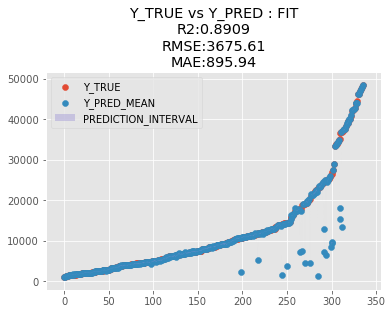

In [48]:
y_pred = model.predict_best(X_test, q = 0.95, y_scaler = y_scaler)
model.plot_pred_fit(y_pred, y_test, y_scaler = y_scaler)

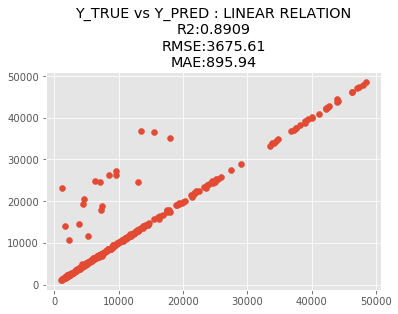

In [57]:
model.plot_pred_vs_true(y_pred, y_test, y_scaler = y_scaler)

Wow! This is completely insane! With a R2 of 89.09 and a MAE of 882.54, The MDN just destroyed it! (You can see one of my previous article to compare with XGBoost results on same dataset/data preparation: "https://github.com/CoteDave/blog/blob/master/Demonstrating%20the%20power%20of%20feature%20engineering/Demonstrating%20the%20power%20of%20feature%20engineering%20-%20Part%20II.ipynb")

Let’s plot the fitted vs true distribution for fun:


1... /1


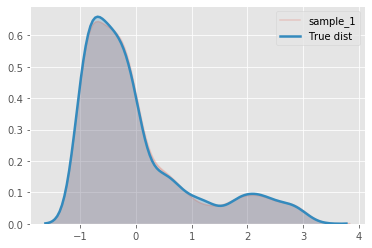

In [49]:
model.plot_distribution_fit(n_samples_batch = 1)

Almost exactly the same!

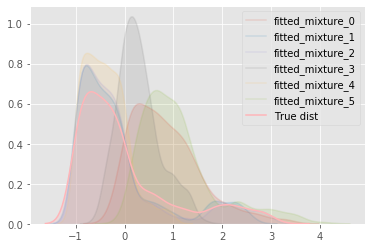

In [50]:
model.plot_all_distribution_fit(n_samples_batch = 1)

There is a total of six different distributions in the general distribution.

We can generate multivariate samples from the fitted mixture model (a PCA is applied to visualize the result in 2D):


1... /1


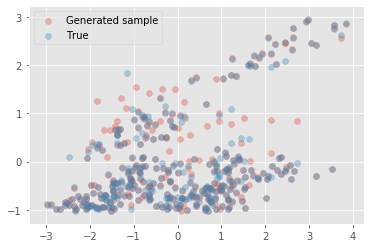

In [51]:
model.plot_samples_vs_true(X_test, y_test, alpha = 0.35, y_scaler = y_scaler)

The generated samples are very close to the real ones!

We can predict from each distribution if we want:


In [52]:
y_pred_dist = model.predict_dist(X_test, q = 0.95, y_scaler = y_scaler)
y_pred_dist

[      Y_PRED_MEAN  Y_PRED_LOWER  Y_PRED_UPPER   DIST_PI   DIST_MU  DIST_VAR  \
 0    14988.934934   7619.923843  22357.946026  0.001187  0.139748  0.314406   
 1    22492.065841  12799.650715  32184.480967  0.003733  0.769463  0.413536   
 2    19444.115294  11358.713556  27529.517031  0.000993  0.513658  0.344971   
 3    28878.410039  21710.725104  36046.094974  0.000953  1.305449  0.305816   
 4    23750.385578  17303.092103  30197.679053  0.000732  0.875070  0.275080   
 ..            ...           ...           ...       ...       ...       ...   
 331  29215.715627  22559.699804  35871.731450  0.000319  1.333758  0.283985   
 332  23532.149723  16126.495432  30937.804014  0.001019  0.856754  0.315969   
 333  24380.139890  15377.133734  33383.146045  0.000232  0.927923  0.384122   
 334  19122.483263  11353.755137  26891.211389  0.000517  0.486664  0.331460   
 335  40480.448595  19830.999104  61129.898086  0.000354  2.279172  0.881028   
 
      N_CLUSTER  
 0            0  
 1

We can check if there are overlapping cluster in the dataset:

In [56]:
y_pred_overlaps = model.predict_with_overlaps(X_test, q = 0.95, y_scaler = y_scaler, pi_threshold = 0.25)
y_pred_overlaps

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y_PRED_MEAN,Y_PRED_LOWER,Y_PRED_UPPER,DIST_PI,POSSIBLE_MIX,SOURCE
0,0.937286,-0.350578,0.057805,-0.120218,0.242699,0.760662,1.775639,-0.621455,-0.553978,0.975426,-0.501554,6942.136980,6836.891749,7047.382212,0.678996,M2,M2
1,-1.066910,-0.350578,-0.012623,-0.189736,-1.229027,1.599812,-0.563178,-0.621455,-0.553978,-1.025193,-0.501554,7975.740066,7903.898830,8047.581301,0.871159,M2,M2
2,-1.066910,-0.350578,-1.491630,-1.243060,-1.492388,-0.917637,-0.563178,-0.621455,-0.553978,-1.025193,1.993802,14206.650015,14182.483425,14230.816604,0.929511,M2,M2
3,-1.066910,-0.350578,0.550808,0.415683,-0.206565,-0.078488,1.775639,-0.621455,-0.553978,-1.025193,-0.501554,8993.945428,8929.234753,9058.656103,0.927692,M2,M2
4,0.937286,-0.350578,-1.491630,-1.243060,-0.067138,1.599812,-0.563178,-0.621455,-0.553978,0.975426,-0.501554,3583.123502,3534.126043,3632.120961,0.252206,"M2,M4",M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.937286,-0.350578,0.902952,0.851268,0.063320,-0.917637,-0.563178,-0.621455,1.805125,-1.025193,-0.501554,9709.161574,9653.091390,9765.231759,0.687142,M4,M4
351,0.937286,-0.350578,-0.012623,-0.189736,0.324235,-0.917637,-0.563178,-0.621455,1.805125,-1.025193,-0.501554,5626.639320,5560.761485,5692.517156,0.866609,M4,M4
352,0.937286,-0.350578,-0.716912,-0.788115,1.325498,-0.078488,-0.563178,1.609126,-0.553978,0.975426,-0.501554,3521.015133,3474.787843,3567.242423,0.874330,M4,M4
353,0.937286,-0.350578,0.762094,0.671755,2.272131,-0.917637,-0.563178,-0.621455,-0.553978,-1.025193,-0.501554,9212.205724,9169.163588,9255.247861,0.866457,M4,M4


## CONCLUSION:

•	MDN did a great job in the univariate regression dataset where two clusters overlapped on each other and where X could have more than one Y output, compared to linear or nonlinear classical ML models.

•	MDN did also a great job in the multivariate regression problem and can compete with popular model like XGBoost

•	MDN is a great and unique tool to have in your ML toolbox and can resolve particular problems that other models can’t do (capable of learning from data obtained from a mixed distribution)

•	As MDN learn the distribution, you can also compute uncertainty with your predictions or generate new samples from the learned distribution

I hope this article helped you in your Machine Learning journey!
